<img src='Cover Photo/Customer Segmentation.jpg' style='height:500px'/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Order-Database" data-toc-modified-id="Order-Database-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Order Database</a></span></li><li><span><a href="#Customer-Database" data-toc-modified-id="Customer-Database-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Customer Database</a></span></li><li><span><a href="#Payment-Database" data-toc-modified-id="Payment-Database-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Payment Database</a></span></li><li><span><a href="#Item-Database" data-toc-modified-id="Item-Database-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Item Database</a></span></li><li><span><a href="#Product-Database" data-toc-modified-id="Product-Database-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Product Database</a></span></li><li><span><a href="#Translation-Database" data-toc-modified-id="Translation-Database-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Translation Database</a></span></li><li><span><a href="#Review-Database" data-toc-modified-id="Review-Database-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Review Database</a></span></li><li><span><a href="#Seller-Database" data-toc-modified-id="Seller-Database-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Seller Database</a></span></li><li><span><a href="#Database-Joins" data-toc-modified-id="Database-Joins-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Database Joins</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploratory-Data-Analytics" data-toc-modified-id="Exploratory-Data-Analytics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analytics</a></span></li><li><span><a href="#PCA-based-Clustering" data-toc-modified-id="PCA-based-Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PCA-based Clustering</a></span><ul class="toc-item"><li><span><a href="#Standard-Scaler" data-toc-modified-id="Standard-Scaler-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Standard Scaler</a></span></li><li><span><a href="#Elbow-Diagram" data-toc-modified-id="Elbow-Diagram-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Elbow Diagram</a></span></li><li><span><a href="#Principle-Component-Analysis" data-toc-modified-id="Principle-Component-Analysis-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Principle Component Analysis</a></span></li><li><span><a href="#K-means-Clusters" data-toc-modified-id="K-means-Clusters-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>K-means Clusters</a></span></li></ul></li><li><span><a href="#RFM-based-Clustering" data-toc-modified-id="RFM-based-Clustering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RFM-based Clustering</a></span><ul class="toc-item"><li><span><a href="#Standard-Scaler" data-toc-modified-id="Standard-Scaler-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Standard Scaler</a></span></li><li><span><a href="#Elbow-Diagram" data-toc-modified-id="Elbow-Diagram-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Elbow Diagram</a></span></li><li><span><a href="#K-means-Clustering" data-toc-modified-id="K-means-Clustering-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>K-means Clustering</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Problem Statement

This report presents a method to segment customerce into groups based on their shopping behavior to be used to design distinct marketing strategies. The data is obtained from a [public repository](https://www.kaggle.com/olistbr/brazilian-ecommerce) where information about the data can be found.

# Data Cleaning

In [2]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


## Order Database

In [3]:
# read data and show its high-level information
order_df = pd.read_csv('olist_orders_dataset.csv')
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
# drop irrelevant columns
order_df.drop(['order_status',
               'order_delivered_carrier_date',
               'order_approved_at',
               'order_delivered_customer_date',
               'order_estimated_delivery_date'], axis='columns', inplace=True)
order_df.columns

In [ ]:
# assign datetime data type for date/time columns  
order_df.order_purchase_timestamp = pd.to_datetime(order_df.order_purchase_timestamp)
order_df.dtypes

In [ ]:
order_df.order_purchase_timestamp = order_df.order_purchase_timestamp.dt.date
#pocipr_df['order_purchase_timestamp'] = pocipr_df['order_purchase_timestamp'].dt.date

In [4]:
# duplicate rows of dataframe
order_df[order_df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [6]:
# head of values
order_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13


## Customer Database

In [7]:
# read data and show its high-level information
customer_df = pd.read_csv('olist_customers_dataset.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# drop irrelevant columns
customer_df.drop(['customer_zip_code_prefix',
                  'customer_city'], axis='columns', inplace=True)

In [10]:
customer_df.nunique()

customer_id           99441
customer_unique_id    96096
customer_state           27
dtype: int64

In [8]:
# duplicate rows of dataframe
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [11]:
# head of values
customer_df.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP


## Payment Database

In [12]:
# read data and show its high-level information
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
# drop irrelevant columns
payment_df.drop('payment_sequential', axis='columns', inplace=True)

In [15]:
# head of values
payment_df.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [14]:
# duplicate rows of dataframe
payment_df[payment_df.duplicated()]

,order_id,payment_type,payment_installments,payment_value
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,1,15.00
4829,59d02be1c50fb6e6930cafd6ff6a31e5,voucher,1,20.00
5091,4689b1816de42507a7d63a4617383c59,voucher,1,56.42
6940,cf101c3abd3c061ca9f78c1bbb1125af,voucher,1,8.46
7441,d744783ed2ace06cac647a9e64dcbcfd,voucher,1,1.47
...,...,...,...,...
102942,dbc097913df341f30b9f9e92f459cee2,voucher,1,50.00
103046,c5fd5386640ddd76adc482b72d24a02b,voucher,1,5.79
103216,4d9190887b47ff1b89c657c788c038f6,voucher,1,12.80
103551,1ea11b975aea60ca92fa0559184d3d34,voucher,1,12.69


## Item Database

In [17]:
# read data and show its high-level information
item_df = pd.read_csv('olist_order_items_dataset.csv')

In [18]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
# drop irrelevant columns
item_df.drop('order_item_id', axis='columns', inplace=True)

In [21]:
# drop irrelevant columns
item_df.drop(['seller_id',
              'shipping_limit_date'], axis='columns', inplace=True)
item_df.columns

Index(['order_id', 'product_id', 'price', 'freight_value'], dtype='object')

In [20]:
# duplicate rows of dataframe
item_df[item_df.duplicated()]

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [22]:
# head of values
item_df.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


## Product Database

In [23]:
# read data and show its high-level information
product_df = pd.read_csv('olist_products_dataset.csv')

In [24]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
product_df.fillna(product_df.median(), inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
product_df.fillna('other', inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32951 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
# duplicate rows of dataframe
product_df[product_df.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [28]:
# head of values
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Translation Database

In [30]:
# read data and show its high-level information
translation_df = pd.read_csv('product_category_name_translation.csv')
translation_df.info()

# head of values
translation_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Review Database

In [31]:
# read data and show its high-level information
review_df = pd.read_csv('olist_order_reviews_dataset.csv')
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
# drop irrelevant columns
review_df.drop(['review_id',
                'review_creation_date',
                'review_answer_timestamp'], axis='columns', inplace=True)
review_df.columns

Index(['order_id', 'review_score', 'review_comment_title',
       'review_comment_message'],
      dtype='object')

In [34]:
for columns in ['review_comment_title', 'review_comment_message']:
    # replace present values with 1
    review_df.loc[review_df[columns].notnull(), columns] = 1
    # replace null values with 0
    review_df.loc[review_df[columns].isna(), columns] = 0
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
order_id                  100000 non-null object
review_score              100000 non-null int64
review_comment_title      100000 non-null int64
review_comment_message    100000 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [32]:
# duplicate rows of dataframe
review_df[review_df.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [35]:
# head of values
review_df.head()

,order_id,review_score,review_comment_title,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,0,0
1,a548910a1c6147796b98fdf73dbeba33,5,0,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0
3,658677c97b385a9be170737859d3511b,5,0,1
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,1


## Seller Database

In [39]:
# read data and show its high-level information
seller_df = pd.read_csv('olist_sellers_dataset.csv')
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
# drop irrelevant columns
seller_df.drop(['seller_zip_code_prefix',
                'seller_city'], axis='columns', inplace=True)
seller_df.columns

Index(['seller_id', 'seller_state'], dtype='object')

In [32]:
# duplicate rows of dataframe
seller_df[seller_df.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [35]:
# head of values
seller_df.head()

,order_id,review_score,review_comment_title,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,0,0
1,a548910a1c6147796b98fdf73dbeba33,5,0,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0
3,658677c97b385a9be170737859d3511b,5,0,1
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,1


## Database Joins

In [41]:
oc_df = pd.merge(order_df, customer_df, how='left', on='customer_id')
oc_df.drop('customer_id', axis='columns', inplace=True)
oc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 4 columns):
order_id                    99441 non-null object
order_purchase_timestamp    99441 non-null object
customer_unique_id          99441 non-null object
customer_state              99441 non-null object
dtypes: object(4)
memory usage: 3.8+ MB


In [42]:
ocp_df = pd.merge(oc_df, payment_df, how='left', on='order_id')
ocp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 7 columns):
order_id                    103887 non-null object
order_purchase_timestamp    103887 non-null object
customer_unique_id          103887 non-null object
customer_state              103887 non-null object
payment_type                103886 non-null object
payment_installments        103886 non-null float64
payment_value               103886 non-null float64
dtypes: float64(2), object(5)
memory usage: 6.3+ MB


In [43]:
ocpr_df = pd.merge(ocp_df, review_df, how='left', on='order_id')
ocpr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104486 entries, 0 to 104485
Data columns (total 10 columns):
order_id                    104486 non-null object
order_purchase_timestamp    104486 non-null object
customer_unique_id          104486 non-null object
customer_state              104486 non-null object
payment_type                104485 non-null object
payment_installments        104485 non-null float64
payment_value               104485 non-null float64
review_score                104486 non-null int64
review_comment_title        104486 non-null int64
review_comment_message      104486 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 8.8+ MB


In [44]:
ocpri_df = pd.merge(ocpr_df, item_df, how='left', on='order_id')
ocpri_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 13 columns):
order_id                    119151 non-null object
order_purchase_timestamp    119151 non-null object
customer_unique_id          119151 non-null object
customer_state              119151 non-null object
payment_type                119148 non-null object
payment_installments        119148 non-null float64
payment_value               119148 non-null float64
review_score                119151 non-null int64
review_comment_title        119151 non-null int64
review_comment_message      119151 non-null int64
product_id                  118318 non-null object
price                       118318 non-null float64
freight_value               118318 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 12.7+ MB


In [45]:
ocprip_df = pd.merge(ocpri_df, product_df, how='left', on='product_id')
ocprip_df.drop('product_id', axis='columns', inplace=True)
ocprip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 20 columns):
order_id                      119151 non-null object
order_purchase_timestamp      119151 non-null object
customer_unique_id            119151 non-null object
customer_state                119151 non-null object
payment_type                  119148 non-null object
payment_installments          119148 non-null float64
payment_value                 119148 non-null float64
review_score                  119151 non-null int64
review_comment_title          119151 non-null int64
review_comment_message        119151 non-null int64
price                         118318 non-null float64
freight_value                 118318 non-null float64
product_category_name         118318 non-null object
product_name_lenght           118318 non-null float64
product_description_lenght    118318 non-null float64
product_photos_qty            118318 non-null float64
product_weight_g              118318 

In [46]:
ocprip_df.fillna(ocprip_df.median(), inplace=True)

In [47]:
for column in ['payment_type', 'product_category_name']:
    ocprip_df[column].fillna(ocprip_df[column].value_counts().index[0], inplace=True)

In [48]:
ocprip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 20 columns):
order_id                      119151 non-null object
order_purchase_timestamp      119151 non-null object
customer_unique_id            119151 non-null object
customer_state                119151 non-null object
payment_type                  119151 non-null object
payment_installments          119151 non-null float64
payment_value                 119151 non-null float64
review_score                  119151 non-null int64
review_comment_title          119151 non-null int64
review_comment_message        119151 non-null int64
price                         119151 non-null float64
freight_value                 119151 non-null float64
product_category_name         119151 non-null object
product_name_lenght           119151 non-null float64
product_description_lenght    119151 non-null float64
product_photos_qty            119151 non-null float64
product_weight_g              119151 

# Feature Engineering

In [49]:
# group features by customer with approperiate metric
df = ocprip_df.groupby('customer_unique_id').agg({'order_id': 'count',
                                                  'payment_value': 'sum',
                                                  'payment_installments': 'mean',
                                                  'review_score': 'mean',
                                                  'price': 'mean',
                                                  'freight_value': 'mean',
                                                  'product_name_lenght': 'mean',
                                                  'product_description_lenght': 'mean',
                                                  'product_photos_qty': 'mean',
                                                  'product_length_cm': 'mean',
                                                  'product_height_cm': 'mean',
                                                  'product_width_cm': 'mean',
                                                  'review_comment_title': 'mean',
                                                  'review_comment_message': 'mean',
                                                  'payment_type': lambda x: x.value_counts().index[0],
                                                  'product_category_name': lambda x: x.value_counts().index[0],
                                                  'customer_state': lambda x: x.value_counts().index[0],
                                                  'order_purchase_timestamp': lambda x: min((max(ocprip_df.order_purchase_timestamp)-x).dt.days)})
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,review_comment_title,review_comment_message,payment_type,product_category_name,customer_state,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,7.0,32.0,1.0,1.0,credit_card,cama_mesa_banho,SP,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,11.0,18.0,0.0,0.0,credit_card,beleza_saude,SP,163
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,50.0,35.0,0.0,0.0,credit_card,papelaria,SC,586
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,5.0,11.0,0.0,1.0,credit_card,telefonia,PA,370
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,3.0,11.0,0.0,0.0,credit_card,telefonia,SP,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,75.0,61.0,0.0,0.0,credit_card,beleza_saude,PE,496
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,36.0,27.0,0.0,0.0,credit_card,bebes,BA,311
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,15.0,13.0,0.0,0.0,credit_card,automotivo,MT,617


In [22]:
# write/read computationally expensive data to/from csv
#df.to_csv('df.csv', index=True);
df = pd.read_csv('df.csv', index_col=0)
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,review_comment_title,review_comment_message,payment_type,product_category_name,customer_state,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,7.0,32.0,1.0,1.0,credit_card,cama_mesa_banho,SP,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,11.0,18.0,0.0,0.0,credit_card,beleza_saude,SP,163
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,50.0,35.0,0.0,0.0,credit_card,papelaria,SC,586
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,5.0,11.0,0.0,1.0,credit_card,telefonia,PA,370
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,3.0,11.0,0.0,0.0,credit_card,telefonia,SP,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,75.0,61.0,0.0,0.0,credit_card,beleza_saude,PE,496
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,36.0,27.0,0.0,0.0,credit_card,bebes,BA,311
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,15.0,13.0,0.0,0.0,credit_card,automotivo,MT,617


# Exploratory Data Analytics

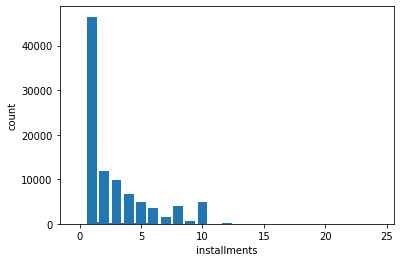

In [6]:
plt.bar(df.payment_installments.value_counts().index, df.payment_installments.value_counts().values);
plt.xlabel('installments')
plt.ylabel('count');

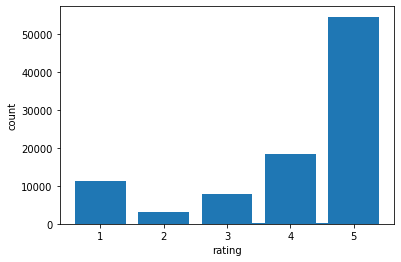

In [7]:
plt.bar(df.review_score.value_counts().index, df.review_score.value_counts().values);
plt.xlabel('rating')
plt.ylabel('count');

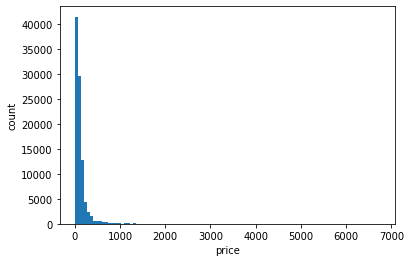

In [8]:
plt.hist(df.price, bins=100)
plt.xlabel('price')
plt.ylabel('count');

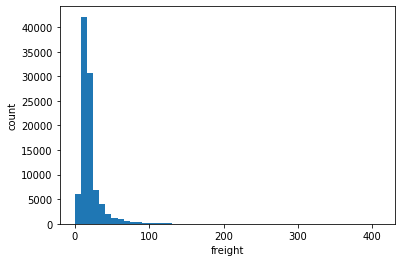

In [9]:
plt.hist(df.freight_value, bins=50)
plt.xlabel('freight')
plt.ylabel('count');

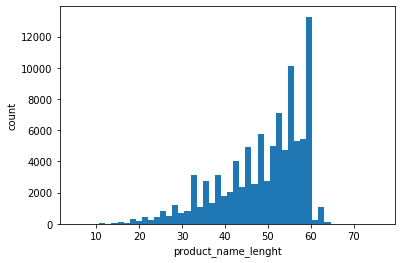

In [10]:
plt.hist(df.product_name_lenght, bins=50)
plt.xlabel('product_name_lenght')
plt.ylabel('count');

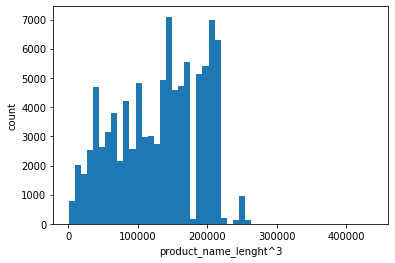

In [20]:
plt.hist(np.power(df.product_name_lenght, 3), bins=50)
plt.xlabel('product_name_lenght^3')
plt.ylabel('count');

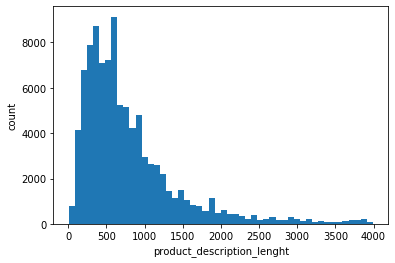

In [12]:
plt.hist(df.product_description_lenght, bins=50)
plt.xlabel('product_description_lenght')
plt.ylabel('count');

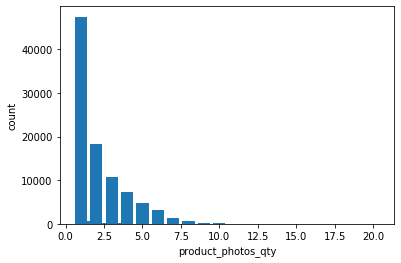

In [13]:
plt.bar(df.product_photos_qty.value_counts().index, df.product_photos_qty.value_counts().values)
plt.xlabel('product_photos_qty')
plt.ylabel('count');

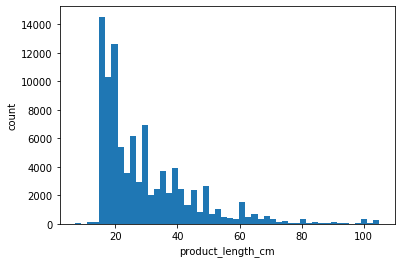

In [14]:
plt.hist(df.product_length_cm, bins=50)
plt.xlabel('product_length_cm')
plt.ylabel('count');

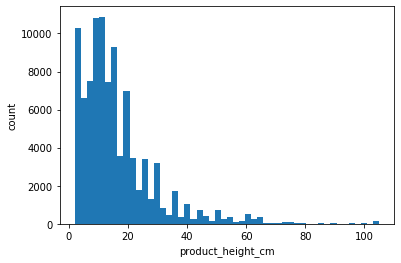

In [16]:
plt.hist(df.product_height_cm, bins=50)
plt.xlabel('product_height_cm')
plt.ylabel('count');

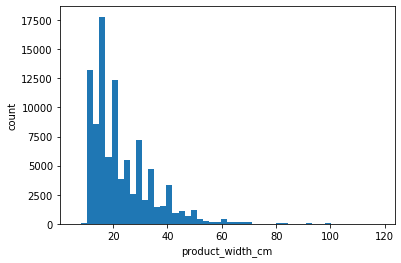

In [17]:
plt.hist(df.product_width_cm, bins=50)
plt.xlabel('product_width_cm')
plt.ylabel('count');

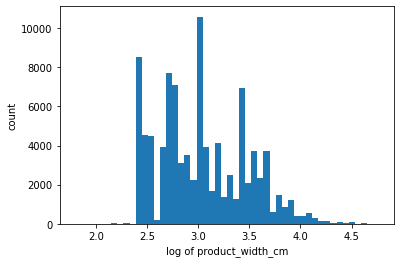

In [18]:
plt.hist(np.log(df.product_width_cm), bins=50)
plt.xlabel('log of product_width_cm')
plt.ylabel('count');

In [119]:
pocipr_df.payment_type.nunique()

4

In [120]:
pocipr_df.product_category_name_english.nunique()

72

In [121]:
pocipr_df.customer_state.nunique()

27

The number of unique values for categorical features are not very large. Therefore, it is decided to one hot encode all of them for the first modeling round.

# PCA-based Clustering

In [23]:
df = pd.get_dummies(df)
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,...,0,0,0,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,...,0,0,0,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,...,0,0,0,0,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,...,0,0,0,0,0,0,0,0,0,0


## Standard Scaler

In [186]:
#df = df.sample(frac=0.1)

In [31]:
# standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

## Elbow Diagram

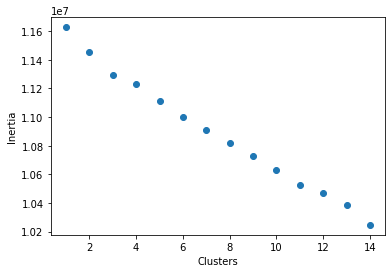

In [188]:
# elbow diagram
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = km.inertia_    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

## Principle Component Analysis

Text(0, 0.5, 'explained variance')

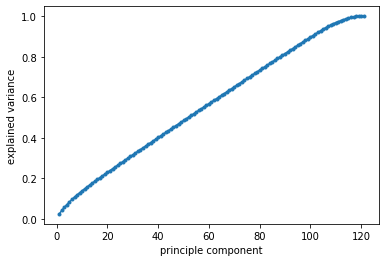

In [14]:
# cumulative sum explained variance ratio plot
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X)
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='.');
plt.xlabel('principle component')
plt.ylabel('explained variance')

The explained variance curve suggests that the features are uncorrelated with one another in general; however, a few important ones should be chosen to achieve a reasonable segmentation.

In [36]:
# principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

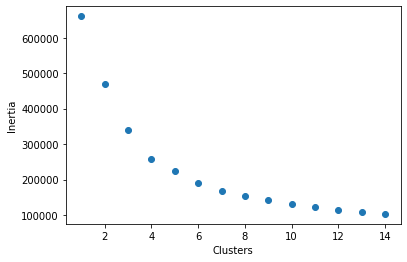

In [190]:
# elbow diagram
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X_pca)
    inertia_dict[k] = km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

For 3 features, elbow diagram suggests that the slope of diagram starts reducing starting at 4 clusters. Furthermore, low number of segments is desirable in marketing because it makes it easier to keep track of the implemented strategies. As a result, four clusters are chosen for start.

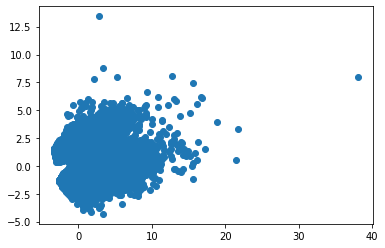

In [208]:
plt.scatter(X_pca[:,0],X_pca[:,1])

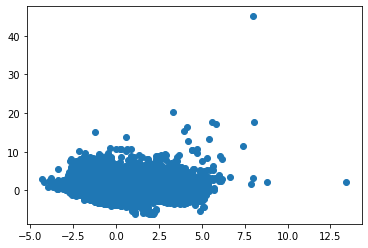

In [204]:
plt.scatter(X_pca[:,1],X_pca[:,2])

## K-means Clusters

In [37]:
km = KMeans(n_clusters=4).fit(X_pca)

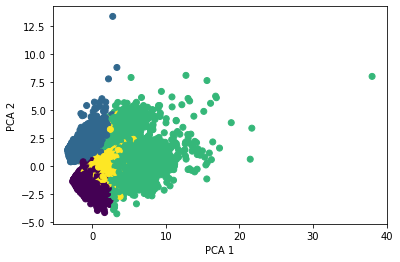

In [41]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

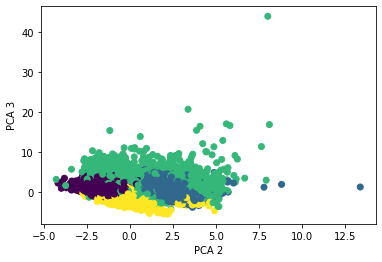

In [42]:
plt.scatter(X_pca[:,1], X_pca[:,2], c=km.labels_)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3');

The selected four clusters are visible in both views of data; however, there are quite a lot of interference between points from different clusters specially in the second view.

In [193]:
np.bincount(km.labels_)

array([23264, 40364, 27102,  5366], dtype=int64)

In [16]:
from scipy import stats
corr_array=[]
for i in range(df.shape[1]-1):  
    corr_array.append([df.columns[i],
                       np.abs(stats.pearsonr(df[df.columns[i]], X_pca[:,0])[0]),
                       stats.pearsonr(df[df.columns[i]], X_pca[:,0])[0],
                       stats.pearsonr(df[df.columns[i]], X_pca[:,0])[1]])
    
corr_df = pd.DataFrame(corr_array, columns = ['feature', 'abs_corr', 'corr', 'p_value'])
corr_df.sort_values(by='abs_corr', ascending=False, inplace=True)
corr_df.reset_index(drop=True, inplace=True)
corr_df

,feature,abs_corr,corr,p_value
0,freight_value,0.693182,0.693182,0.000000
1,product_width_cm,0.629904,0.629904,0.000000
2,product_length_cm,0.590800,0.590800,0.000000
3,product_height_cm,0.578383,0.578383,0.000000
4,price,0.572685,0.572685,0.000000
...,...,...,...,...
115,product_category_name_cds_dvds_musicais,0.002814,-0.002814,0.383008
116,customer_state_PR,0.001783,-0.001783,0.580466
117,product_category_name_construcao_ferramentas_s...,0.001626,0.001626,0.614164
118,product_category_name_artigos_de_natal,0.000982,-0.000982,0.760772


Text(0.5, 0, 'normalized coefficient')

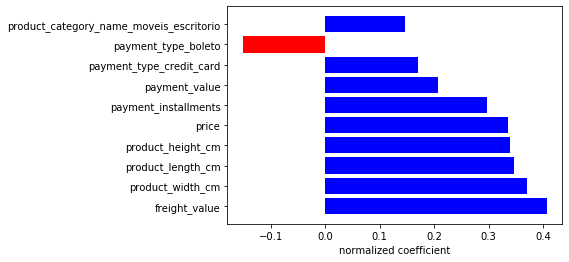

In [49]:
X=df
y=X_pca[:,0]

# scale data with standard scaler
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

# fit logit function 
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
logit = sm.OLS(y, X_withconstant).fit()
#display(logit.summary()) 

# table of significant coefficinets sorted by absolute value
coef_table = logit.summary().tables[1]
coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df.drop(0, axis='index', inplace=True)
coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

# bar chart of feature coefficients
bar_names = coefs_by_mag['']
bar_heights = coefs_by_mag['coef']
bar_colors = np.where(bar_heights>0, 'blue', 'red')
#plt.figure(figsize=(5.0, 20))
plt.barh(bar_names[:10], bar_heights[:10], color=bar_colors)
plt.xlabel('normalized coefficient')

There are very many factors related to these principle components that it is difficult to interprete the cluster results based on original features

In [201]:
# cluster description list 
customer_segment_list = []
for cluster in range(4):
    if km.cluster_centers_[cluster, 0] > 0:
        customer_segment_list.append('current | ')
    else:
        customer_segment_list.append('churned | ')
    if km.cluster_centers_[cluster, 1] > 0:
        customer_segment_list[cluster] += 'regular | '
    else:
        customer_segment_list[cluster] += 'one time | '
    if km.cluster_centers_[cluster, 2] > 0:
        customer_segment_list[cluster] += 'high value'
    else:
        customer_segment_list[cluster] += 'low value'

customer_segment_list

['churned | regular | high value',
 'churned | one time | high value',
 'current | one time | low value',
 'current | regular | high value']

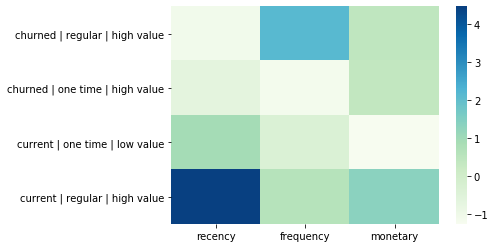

In [202]:
# cluster characteristic heatmap 
import seaborn as sns
sns.heatmap(km.cluster_centers_, cmap='GnBu', 
            xticklabels=rfm_df.columns,
            yticklabels=customer_segment_list);

Text(0, 0.5, 'TSNE 2')

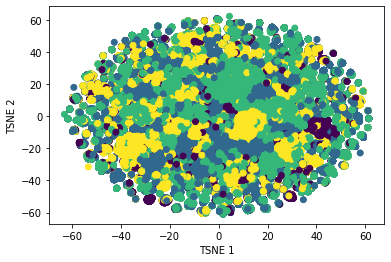

In [161]:
# TSNE plot of clusters
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=km.labels_)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

TSNE plot for this clustering verifies that the uniformity of clusters are not acceptable.

In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

-0.004697534550971745

The small silhouette score verifies the overlapping clusters. The negative sign indicates that in average data points have been assigned to the wrong cluster while they would be more similar to a different cluster.

In [34]:
km = KMeans(n_clusters=2).fit(X_pca)

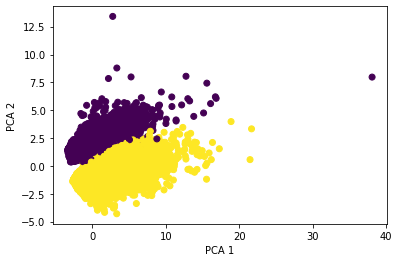

In [229]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

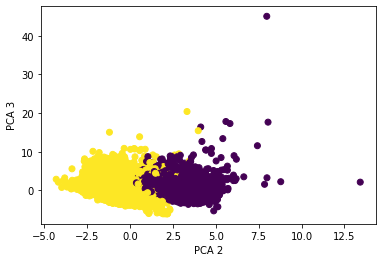

In [230]:
plt.scatter(X_pca[:,1], X_pca[:,2], c=km.labels_)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3');

There is a good seperation in case of two clusters. Furthermore, visualization of clusters along principle components suggests that the main difference between two clusters is based on PCA 2.

In [231]:
np.bincount(km.labels_)

array([24292, 71804], dtype=int64)

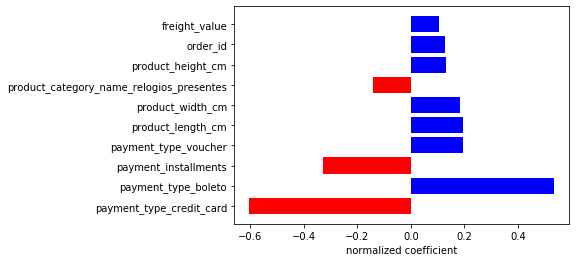

In [54]:
X=df
y=X_pca[:,1]

# scale data with standard scaler
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

# fit logit function 
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
logit = sm.OLS(y, X_withconstant).fit()
# display(logit.summary()) 

# table of significant coefficinets sorted by absolute value
coef_table = logit.summary().tables[1]
coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df.drop(0, axis='index', inplace=True)
coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

# bar chart of feature coefficients
bar_names = coefs_by_mag['']
bar_heights = coefs_by_mag['coef']
bar_colors = np.where(bar_heights>0, 'blue', 'red')
plt.barh(bar_names[:10], bar_heights[:10], color=bar_colors)
plt.xlabel('normalized coefficient');

Even though PCA 2 is still a linear combination of a number of features, but the bar chart suggests that it many of the important factors are payment methods. Specifically, the negative direction on this dimension is associated with credit card while the positive direction is associated with boleto, voucher, and debit card. Given that the main distinction of clusters is along PCA 2, it can be concluded that the clusters essentially are just showing a pattern in payment method.

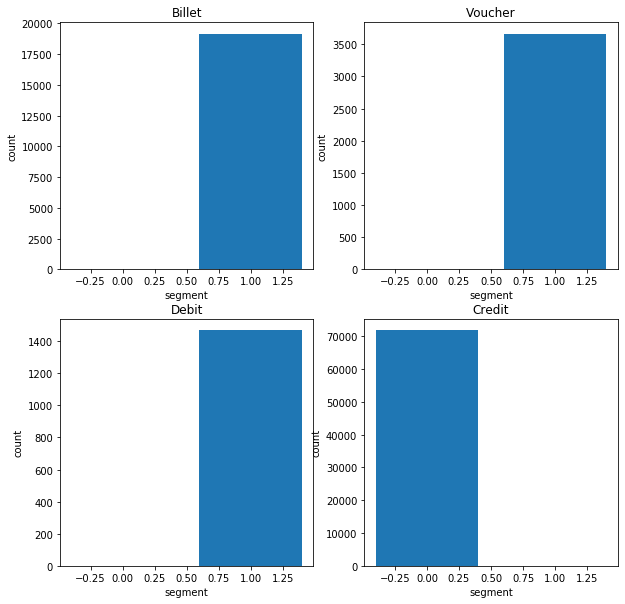

In [31]:
df['cluster_label'] = km.labels_

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
df.groupby('cluster_label').sum()['payment_type_boleto'].plot(kind='bar')
plt.title('Billet')
plt.xlabel('segment')
plt.ylabel('count') 

plt.subplot(2, 2, 2)
df.groupby('cluster_label').sum()['payment_type_voucher'].plot(kind='bar')
plt.title('Voucher')
plt.xlabel('segment')
plt.ylabel('count') 

plt.subplot(2, 2, 3)
df.groupby('cluster_label').sum()['payment_type_debit_card'].plot(kind='bar')
plt.title('Debit')
plt.xlabel('segment')
plt.ylabel('count') 

plt.subplot(2, 2, 4)
df.groupby('cluster_label').sum()['payment_type_credit_card'].plot(kind='bar')
plt.title('Credit')
plt.xlabel('segment')
plt.ylabel('count');

The bar charts suggests that segment 0 is almost exclusivly using credit card while the other segment 1 uses non-credit payment methods which confirms the results from the logistic regression.

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.057528798804422084

There is a slight improvement in silhouette score compared to complete feature set; however, still it has a small value.

# RFM-based Clustering

In [162]:
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,...,0,0,0,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,...,0,0,0,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,...,0,0,0,0,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,...,0,0,0,0,0,0,0,0,0,0


## Standard Scaler

In [25]:
# rfm model
rfm_df = df[['order_purchase_timestamp', 'order_id', 'payment_value']]
rfm_df.columns = ['recency', 'frequency', 'monetary']
rfm_df = rfm_df.sample(frac=0.1)

In [26]:
# standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(rfm_df)

## Elbow Diagram

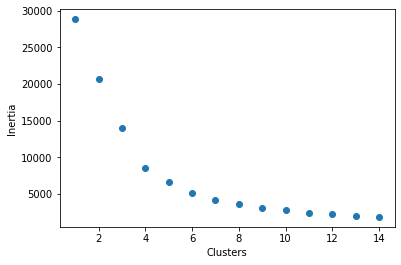

In [254]:
# elbow diagram
from sklearn.cluster import KMeans
inertia_dict = {}
for k in range(1,15):
    rfm_km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = rfm_km.inertia_
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

In elbow diagram the slope of the curve starts to decrease from four clusters on. Furthermore, low number of clusters is better from marketing perspective because it is easier to keep track of the customer segments. Therefore, four clusters are selected as hyperparameters of the algorithm.

In [28]:
n_clusters = 4

## K-means Clustering

In [29]:
km = KMeans(n_clusters=n_clusters).fit(X)
labels = km.labels_

In [257]:
np.bincount(labels)

array([3938, 5286,  385,    1], dtype=int64)

In [258]:
label_count_df = pd.DataFrame(labels)

In [259]:
km.cluster_centers_

array([[ 9.72509722e-01, -1.61650068e-01, -4.13464249e-02],
       [-7.28055559e-01, -1.49111309e-01, -4.22110557e-02],
       [ 4.71068978e-02,  3.67823170e+00,  7.69865501e-01],
       [ 6.22245795e-01,  8.66114137e+00,  8.95516437e+01]])

In [260]:
km.cluster_centers_[1,1]

-0.14911130873240794

In [261]:
n_clusters

4

Text(0, 0.5, 'Monetary')

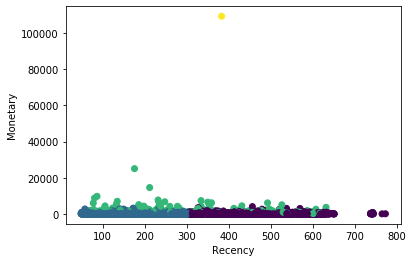

In [262]:
plt.scatter(rfm_df.recency, rfm_df.monetary, c=labels)
plt.xlabel('Recency')
plt.ylabel('Monetary')

Text(0, 0.5, 'Monetary')

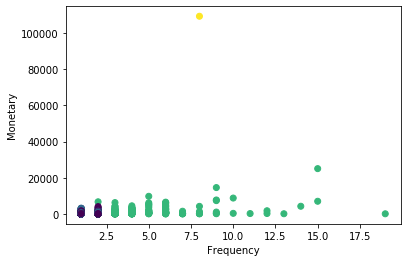

In [263]:
plt.scatter(rfm_df.frequency, rfm_df.monetary, c=labels)
plt.xlabel('Frequency')
plt.ylabel('Monetary')

This result suggests that customers grouped in this manner are objectively more simmilar within each group than any other four segmented groupings.

In [264]:
# cluster description list 
customer_segment_list = []
for cluster in range(n_clusters):
    if km.cluster_centers_[cluster, 0] > 0:
        customer_segment_list.append('current | ')
    else:
        customer_segment_list.append('churned | ')
    if km.cluster_centers_[cluster, 1] > 0:
        customer_segment_list[cluster] += 'regular | '
    else:
        customer_segment_list[cluster] += 'one time | '
    if km.cluster_centers_[cluster, 2] > 0:
        customer_segment_list[cluster] += 'high value'
    else:
        customer_segment_list[cluster] += 'low value'

customer_segment_list

['current | one time | low value',
 'churned | one time | low value',
 'current | regular | high value',
 'current | regular | high value']

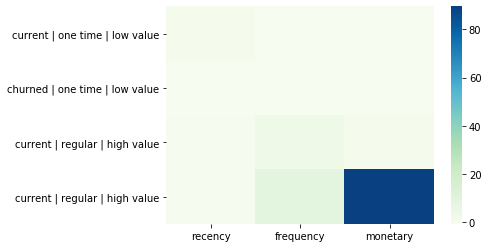

In [265]:
# cluster characteristic heatmap 
import seaborn as sns
sns.heatmap(km.cluster_centers_, cmap='GnBu', 
            xticklabels=rfm_df.columns,
            yticklabels=customer_segment_list);

Heat map shows clusters segment customers to quite diverse groups. The descriptions inferred for these groups can be used to created customer personas and propose marketing strategies using [RFM model](https://docs.oracle.com/en/cloud/saas/marketing/responsys-user/RFM_TerminologyMechanics.htm) as shown in the table below:

|Recency|Frequency|Monetary|Persona|Marketing Strategies|
|-|-|-|-|-|
|Churned|One Time|Low Value |Lost|No attempt to reaqcuire|
|Churned|Regular |High Value|Champion|Loyalty Reward|
|Current|One Time|Low Value |New|Welcome Offer|
|Churned|Regular |High Value|Can't Lose|Aggressive Incentives|


Text(0, 0.5, 'TSNE 2')

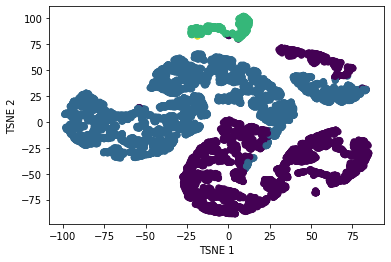

In [266]:
# TSNE plot of clusters
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

TSNE visualization verifies that RFM-based clusters have better uniformity than PCA-based clusters as well.

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.47001388446563297

Silhouette score has significantly improved suggesting more consistent clusters. In other words, data points are considerably more similar to data points that belong to the same cluster than data points in different clusters.

# Conclusion

This report presents a method to segment customerce into groups based on their shopping behavior to be used to design distinct marketing strategies. E-commerce data from a public repository is used as an example. The data points are in form of transaction history where information about different aspects of the order exists in a seperate database. These databases are joined with the order database in the approperiate format to build the transaction history. The dataset used for customer segmentation is generated by grouping transaction information by unique customer IDs. Exploration of the dataset suggests that many of the features have skewed distribution. These skewed features are transformed using logarithm to capture more information. Clustering is initially performed based on the complete feature set; however, results suggests that the number of features are too large to create decent clusters specially given the marketing limitations for number of clusters. The number of features is initially reduced by PCA; however, it is hard to interprete the clusters after PCA. In another approach, RFM model is used to represent the data with three features of recency, frequency, and monetary value. Four clusters are selected by strking a balance between ease of marketing and uniformity of clusters. The results suggests that this approach leads to good clusters. A description for each cluster is generated by evaluating feature values at the center of clusters. These descriptions are used to create customer persona and propose marketing strategies.